# CS584 Machine Learning
## Howmework Project: Crime Prediction

### 1. Decision Trees 

#### a.	Create a new field “highCrime” which is true if the crime rate per capita (ViolentCrimesPerPop) is greater than 0.1, and false otherwise. What are the percentage of positive and negative instances in the dataset?

In [46]:
# Import library

import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
colors = plt.rcParams['axes.color_cycle'][1], plt.rcParams['axes.color_cycle'][4]

In [47]:
#load clean data

df = pd.read_csv("Crime Prediction Data\\communities-crime-clean.csv")

In [48]:
# Create a new field “highCrime” which is true if the crime rate per capita (ViolentCrimesPerPop) is greater than 0.1, and false otherwise

highCrime = []
pos=0
neg=0

for i in df["ViolentCrimesPerPop"]:
    if i > 0.1:
        highCrime.append(True)
        pos+=1
    else:
        highCrime.append(False)
        neg+=1

highCrime = pd.DataFrame(highCrime)

highCrime

,0
0,False
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,False
9,True


Percentage of Positive Instances:  62.719518314099346
Percentage of Negative Instances:  37.280481685900654


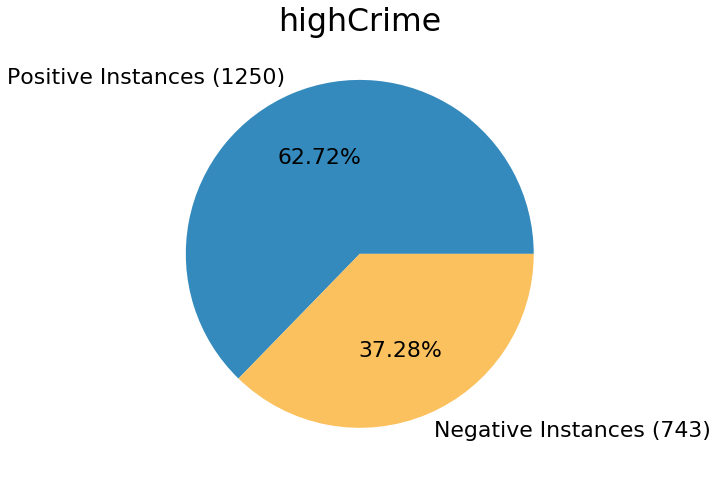

In [49]:
# Percentage of positive and negative instances in the dataset

#Positive Instances

print("Percentage of Positive Instances: ", pos/len(highCrime)*100)

#Negative Instances

print("Percentage of Negative Instances: ", neg/len(highCrime)*100)

fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
labels = ["Positive Instances (%d)" % pos, "Negative Instances (%d)" % neg]
sizes = [pos, neg]
plt.rcParams.update({'font.size': 22})
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title("highCrime")
ax.set_aspect('equal')

#### b.	 Use DecisionTreeClassifier to learn a decision tree to predict highCrime on the entire dataset (remember to exclude the crime rate feature from the input feature set so you are not cheating). 

In [50]:
# Remove non predictive attribute

df = df.drop(["state"], axis=1)
df = df.drop(["communityname"], axis=1)
df = df.drop(["fold"], axis=1)
df = df.drop(["ViolentCrimesPerPop"], axis=1)
df = pd.DataFrame(df)

In [51]:
# Build Decision Tree Classifier 

DT = tree.DecisionTreeClassifier()
DT = DT.fit(df, highCrime)

# Predict class vale for df

DT_predict = DT.predict(df)

#### i.	What are the training accuracy, precision, and recall for this tree? 

In [52]:
# Accuracy
accuracy_DT = metrics.accuracy_score(highCrime, DT_predict)
print("Accuracy: ", accuracy_DT)

# Precision
precision_DT = metrics.precision_score(highCrime, DT_predict)
print("Precision: ", precision_DT )

# Recall
recall_DT = metrics.recall_score(highCrime, DT_predict)
print("Recall:", recall_DT)

Accuracy:  1.0
Precision:  1.0
Recall: 1.0


#### ii.	What are the main features used for classification? Can you explain why they make sense (or not)?

In [53]:
# Importance Features

importantFeatures = sorted(zip(df.columns, DT.feature_importances_), key=lambda x: x[1], reverse=True)
importantFeatures[:10]

[('PctKids2Par', 0.36065507674691555),
 ('racePctWhite', 0.088816855983709739),
 ('racePctHisp', 0.045120094562344233),
 ('PctEmplManu', 0.021210084757928401),
 ('PctLess9thGrade', 0.018588447232337418),
 ('PctWOFullPlumb', 0.015579191000074407),
 ('PctSpeakEnglOnly', 0.013595215174874159),
 ('PctEmploy', 0.013363970726593479),
 ('AsianPerCap', 0.013193318522048421),
 ('MedRent', 0.01308255574884897)]

In [54]:
pd.DataFrame(DT.feature_importances_, columns = ["Imp"], index = df.columns).sort_values(['Imp'], ascending = False)[:10]

,Imp
PctKids2Par,0.360655
racePctWhite,0.088817
racePctHisp,0.045120
PctEmplManu,0.021210
PctLess9thGrade,0.018588
PctWOFullPlumb,0.015579
PctSpeakEnglOnly,0.013595
PctEmploy,0.013364
AsianPerCap,0.013193
MedRent,0.013083


Above table reprsent 10 important features for Decision Tree classifier. In scikit learn, variable importance is calculated using Gini impurity. Both the gini and entropy criteria used for node splitting identify best attribute for splitting the node by its ability to split the dataset into subsets with high impurity so that subsequent splitting leads to good classification. The importance of variable is decided by the amount of impurity it can be induced into the split dataset. The decision tree classifier object has a variable called ‘feature_importances_’. We use this variable and create a list of tuples with the feature number and important. The higher the value, the more important the features. 

#### c.	Now apply cross-validation (cross_val_score) to do 10-fold cross-validation to estimate the out-of-training accuracy of decision tree learning for this task.

#### i.What are the 10-fold cross-validation accuracy, precision, and recall?

In [55]:
DT2 = tree.DecisionTreeClassifier()

# Accuracy
accuracy_DT2 = cross_val_score(DT2,df,highCrime[0].values,cv=10, scoring='accuracy')

# Preciision
precision_DT2 = cross_val_score(DT2,df,highCrime[0].values,cv=10, scoring='precision')

# Recall
recall_DT2 = cross_val_score(DT2,df,highCrime[0].values,cv=10, scoring='recall')

print("Accuracy:\n", accuracy_DT2)
print("Precision:\n", precision_DT2)
print("Recall:\n", recall_DT2)

Accuracy:
 [ 0.745       0.83        0.725       0.73366834  0.64824121  0.66834171
  0.72361809  0.68844221  0.77889447  0.71356784]
Precision:
 [ 0.75172414  0.82677165  0.76744186  0.79699248  0.75728155  0.75229358
  0.79527559  0.875       0.76712329  0.81034483]
Recall:
 [ 0.864  0.848  0.792  0.824  0.64   0.656  0.832  0.64   0.92   0.744]


#### ii.	Why are they different from the results in the previous test?

In [56]:
print("Accuracy on full dataset without cross validation: ", accuracy_DT)
print("Accuracy with cross validation: ", accuracy_DT2.mean())

Accuracy on full dataset without cross validation:  1.0
Accuracy with cross validation:  0.725477386935


Above result display an accuracy of module with and without cross validation.
In ‘cross_val_score’ the parameter ‘cv’ specifies the number of folds; the number of partitions that the original dataset is randomly divided into. Normally, only one parameter would be used in cross-validation while remaining used as a training dataset. In 10- fold cross-validation, split the data into 10 parts, train the module on 9 parts and test the accuracy on remaining 1 part. This is repeated on all combinations to produce ten estimates of the accuracy of the model using the current parameter setting. Prevoiusly we train the module on full dataset also test on full dataset, therefore we get more accuracy as compare to to cross validation.

### 2.	Linear Classification

#### a.	Use GaussianNB to learn a Naive Bayes classifier to predict highCrime.

#### i.	What is the 10-fold cross-validation accuracy, precision, and recall for this method?

In [57]:
# Accuracy

GNB = GaussianNB()
# Accuracy
accuracy_GNB = cross_val_score(GNB,df,highCrime[0].values,cv=10, scoring='accuracy')

# Preciision
precision_GNB = cross_val_score(GNB,df,highCrime[0].values,cv=10, scoring='precision')

# Recall
recall_GNB = cross_val_score(GNB,df,highCrime[0].values,cv=10, scoring='recall')

print("Accuracy:\n", accuracy_GNB)
print("Precision:\n", precision_GNB)
print("Recall\n", recall_GNB)

Accuracy:
 [ 0.775       0.8         0.825       0.79899497  0.70351759  0.65326633
  0.81407035  0.73366834  0.71356784  0.79899497]
Precision:
 [ 0.86363636  0.92929293  0.95        0.92079208  0.94594595  0.86842105
  0.92307692  1.          0.77868852  0.93814433]
Recall
 [ 0.76   0.736  0.76   0.744  0.56   0.528  0.768  0.576  0.76   0.728]


#### ii.	What are the 10 most predictive features

In [58]:
# Funtion to measured normalized absolute difference of means for the feature between the two classes

def predictive_features(data,highCrime):
    true_data = []
    false_data = []
    res=[]
    for i in range(len(highCrime)):
        if (highCrime[0].values[i]):
            true_data.append(data[i])
        else:
            false_data.append(data[i])

    return abs(np.mean(true_data)-np.mean(false_data))/ (np.std(true_data)+np.std(false_data))

In [59]:
# Most Predictive Features

pf=[]
for i in df.columns:
    pf.append(predictive_features(df[i],highCrime))


importantPredictiveFeatures = sorted(zip(df.columns, pf), key=lambda x: x[1], reverse=True)

importantPredictiveFeatures[:10]

[('PctKids2Par', 0.80974842822770576),
 ('PctFam2Par', 0.74554480821667002),
 ('racePctWhite', 0.73522995312324224),
 ('PctIlleg', 0.70926105120057914),
 ('FemalePctDiv', 0.69397808830331542),
 ('TotalPctDiv', 0.67464460922247593),
 ('PctYoungKids2Par', 0.66500856988477031),
 ('pctWInvInc', 0.66107643266548766),
 ('PctTeen2Par', 0.64294944817476585),
 ('MalePctDivorce', 0.61686365922304187)]

In [60]:
pd.DataFrame(pf, columns = ["Imp"], index = df.columns).sort_values(['Imp'], ascending = False)[:10]

,Imp
PctKids2Par,0.809748
PctFam2Par,0.745545
racePctWhite,0.735230
PctIlleg,0.709261
FemalePctDiv,0.693978
TotalPctDiv,0.674645
PctYoungKids2Par,0.665009
pctWInvInc,0.661076
PctTeen2Par,0.642949
MalePctDivorce,0.616864


Above table reprsent 10 important features for Naive Bayes classifier. Score normalized absolute difference of means for the feature between the two classes:
|μ_T-μ_F |/(σ_T+σ_F )
The larger this different, the more predictive the feature.
We observed that attribute 'PctKids2Par' have larger differene as compare to other attributes.


#### iii.	How do these results compare with your results from decision trees, above?

In [61]:
print("Accuracy of Decision Tree Classifier using cross validation:,", accuracy_DT2.mean())
print("Accuracy of Naive Bayes Classifier using cross validation: ", accuracy_GNB.mean())

Accuracy of Decision Tree Classifier using cross validation:, 0.725477386935
Accuracy of Naive Bayes Classifier using cross validation:  0.761608040201


Important Features for Decision Tree Classifier:
PctKids2Par, racePctWhite, racePctHisp, PctEmplManu, PctLess9thGrade, PctImmigRec10, MedRent, TotalPctDiv, HousVacant, and PctVacMore6Mos

Important Features for Naibe Bayes Classifier:
PctKids2Par, PctFam2Par, racePctWhite, PctIlleg, FemalePctDiv , TotalPctDiv, PctYoungKids2Par, pctWInvInc, PctTeen2Par, MalePctDivorce.

Above result reprsent accuracy of Decision Tree Classifier and Naive Bayes Classifier using cross validation. For Decision Tree Classifier we get 0.72 accuracy while for Naive Bayes Classifier we get 0.76 accuracy. As a result we conclude that Naive Bayes classifier is more accurate for Crime Dataset as compare to Decision Tree Classifier. 

#### b.	Use LinearSVC to learn a linear Support Vector Machine model to predict highCrime.

#### i.	 What is the 10-fold cross-validation accuracy, precision, and recall for this method?

In [62]:
LSVC = LinearSVC()

# Accuracy
accuracy_LSVC = cross_val_score(LSVC,df,highCrime[0].values,cv=10, scoring='accuracy')
#Precision
precision_LSVC = cross_val_score(LSVC,df,highCrime[0].values,cv=10, scoring='precision')
#Recall
recall_LSVC = cross_val_score(LSVC,df,highCrime[0].values,cv=10, scoring='recall')

print("Accuracy: \n", accuracy_LSVC)
print("Precision:\n", precision_LSVC)
print("Recall:\n", recall_LSVC)

Accuracy: 
 [ 0.79        0.865       0.84        0.80904523  0.69346734  0.69346734
  0.81407035  0.8241206   0.81909548  0.81407035]
Precision:
 [ 0.76774194  0.84507042  0.82517483  0.85950413  0.87209302  0.7962963
  0.84920635  0.95918367  0.80689655  0.87288136]
Recall:
 [ 0.952  0.96   0.944  0.832  0.6    0.688  0.856  0.752  0.936  0.824]


#### ii.	What are the 10 most predictive features? 

In [63]:
LSVC1 = LinearSVC()
LSVC1 =LSVC1.fit(df,highCrime)
coef  = abs(LSVC1.coef_)
importantPredictiveFeatures = sorted(zip(df.columns, coef[0]), key=lambda x: x[1], reverse=True)

importantPredictiveFeatures[:10]

[('pctWInvInc', 1.8884877542117393),
 ('PersPerOccupHous', 1.7551233612754933),
 ('racePctWhite', 1.5002191193603012),
 ('PctKids2Par', 1.190329637772463),
 ('RentHighQ', 1.0668840652027569),
 ('MalePctDivorce', 1.0656969335054147),
 ('NumUnderPov', 1.051548533779963),
 ('NumStreet', 1.0191558000896355),
 ('PctOccupMgmtProf', 1.014674118343891),
 ('population', 1.0023017135991976)]

In [64]:
pd.DataFrame(coef[0], columns = ["Imp"], index = df.columns).sort_values(['Imp'], ascending = False)[:10]

,Imp
pctWInvInc,1.888488
PersPerOccupHous,1.755123
racePctWhite,1.500219
PctKids2Par,1.190330
RentHighQ,1.066884
MalePctDivorce,1.065697
NumUnderPov,1.051549
NumStreet,1.019156
PctOccupMgmtProf,1.014674
population,1.002302


Above table represent 10 important features for Linear Support Vector Machine model. In lineanr SVM, the result is a hyperplane that separates the classes as best as possible. The weights represent this hyperplane, by giving you the coordinates of a vector which is orthogonal to the hyperplane and and their direction indicates the predicted class. These are the coefficients given by svm.coef_. the absolute size of the coefficient relative to the other ones gives an indication of how important the feature was for the separation

#### iii.	How do these results compare with your results from decision trees, above?

In [65]:
print("Accuracy of Decision Tree Classifier using cross validation:,", accuracy_DT2.mean())
print("Accuracy of Linear Support Vector Machine model using cross validation: ", accuracy_LSVC.mean())

Accuracy of Decision Tree Classifier using cross validation:, 0.725477386935
Accuracy of Linear Support Vector Machine model using cross validation:  0.796233668342


Important Features for Decision Tree Classifier: PctKids2Par, racePctWhite, racePctHisp, PctEmplManu, PctLess9thGrade, PctImmigRec10, MedRent, TotalPctDiv, HousVacant, and PctVacMore6Mos

Important Features for Linear Support Vector Machine model : pctWInvInc, PersPerOccupHous, racePctWhite, PctKids2Par, RentHighQ, MalePctDivorce, NumUnderPov, NumStreet, PctOccupMgmtProf, population.

Above result reprsent accuracy of Decision Tree Classifier and Linear Support Vector Machine model using cross validation. For Decision Tree Classifier we get 0.72 accuracy while for Linear Support Vector Machine model we get 0.79 accuracy. As a result we conclude that Linear Support Vector Machine model is more accurate for Crime Dataset as compare to Decision Tree Classifier.


### 3.	Regression 

#### a.	Use LinearRegression to learn a linear model directly predicting the crime rate per capita (ViolentCrimesPerPop).

#### i.	Using 10-fold cross-validation, what is the estimated mean-squared-error (MSE) of the model?

In [66]:
LR = LinearRegression()
mse_LR = cross_val_score(LR, df, highCrime, scoring='neg_mean_squared_error', cv=10)
print("Estimated Mean Squared Error: \n",mse_LR)

Estimated Mean Squared Error: 
 [-0.11345995 -0.09108316 -0.08759334 -0.17731798 -0.17552054 -0.13612762
 -0.12124171 -0.14860938 -0.12405162 -0.13615172]


#### ii.	What is the MSE on the training set (train on all the data then test on it all)?

In [67]:
LR1 = LinearRegression()
LR1 = LR1.fit(df, highCrime)
LR1_predict = LR1.predict(df)
mse_LR1 = metrics.mean_squared_error(highCrime, LR1_predict)
print("MSE on the training set: ", mse_LR1)

MSE on the training set:  0.115870618337


#### iii.	What features are most predictive of a high crime rate? A low crime rate?

In [68]:
# Most Predictive Features for High Crime Rate

coef = LR1.coef_
print("Most Predictive features for High Crime Rate")
pd.DataFrame(coef[0], columns = ["Imp"], index = df.columns).sort_values(['Imp'], ascending = False)[:10]

Most Predictive features for High Crime Rate


,Imp
population,3.928931
PersPerOccupHous,1.205332
medFamInc,0.926851
PctOccupMgmtProf,0.743965
PctRecImmig8,0.712339
RentHighQ,0.670068
MalePctDivorce,0.599113
PctRecImmig5,0.585687
PctHousOwnOcc,0.535955
PctForeignBorn,0.446307


In [69]:
# Most Predictive Features for Low Crime Rate

coef = LR1.coef_
print("Most Predictive features for Low Crime Rate")
pd.DataFrame(coef[0], columns = ["Imp"], index = df.columns).sort_values(['Imp'], ascending = True)[:10]

Most Predictive features for Low Crime Rate


,Imp
numbUrban,-2.830579
PctKids2Par,-1.236463
PctRecImmig10,-1.213065
medIncome,-1.011500
pctWInvInc,-0.946254
NumIlleg,-0.847100
TotalPctDiv,-0.651321
MedRent,-0.583415
PctRecentImmig,-0.569406
PctBSorMore,-0.492670


#### b.	Now use Ridge regression to reduce the amount of overfitting, using RidgeCV to pick the best alpha from among (10, 1, 0.1, 0.01, and 0.001).

#### i.	What is the estimated MSE of the model under 10-fold CV?

In [70]:
reg_CV = RidgeCV(alphas= (10, 1, 0.1, 0.01,0.001))
mse_reg_CV = cross_val_score(reg_CV, df, highCrime, scoring='neg_mean_squared_error', cv=10)
print("Estimated MSE of Ridge regression:\n", mse_reg_CV)

Estimated MSE of Ridge regression:
 [-0.11138074 -0.08605617 -0.08722479 -0.17631639 -0.17322247 -0.1345373
 -0.1207077  -0.14893708 -0.12415638 -0.13974886]


#### ii.	What is the MSE on the training set (train on all the data then test on it all)?

In [71]:
reg_CV1 = RidgeCV(alphas= (10, 1, 0.1, 0.01,0.001))
reg_CV1 = reg_CV1.fit(df, highCrime)
reg_CV1_predict = reg_CV1.predict(df)
mse_reg_CV1 = metrics.mean_squared_error(highCrime, reg_CV1_predict)
print("MSE on the training set: ", mse_reg_CV1)

MSE on the training set:  0.117714607876


#### iii.What is the best alpha?

In [72]:
print("Best alpha: ",reg_CV1.alpha_)

Best alpha:  1.0


#### iv.	What does this say about the amount of overfitting in linear regression for this problem?

As the value of alpha increases, the model complexity reduces. Though higher values of alpha reduce overfitting. 
With Linear regressin we were overfitting our data. Ridge is more restricted model, so we are less likely to overfit. Increase alpha forces coefficients to move more toward zero, which decrase training set performance but might help generalization. We get best alpha as 1.0 for this model which decrease amount of overfitting. For less alpha like 0.1, 0.01, 0.001 we get more overfitting while alpha like 10 which is grater than 1.0, modules goes to underfitting.

#### c.	Now use polynomial features to do quadratic (second-order) polynomial regression.

#### i.	What is the estimated MSE of the model under 10-fold CV?

In [73]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()

model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])

model.fit(df,highCrime)

mse_model = cross_val_score(model,df,highCrime[0].values, scoring='neg_mean_squared_error',cv=10)

print("Estimated MSE of the model Polynomial Features:\n",mse_model)

Estimated MSE of the model Polynomial Features:
 [-0.92207534 -1.33619384 -1.43839118 -0.90043162 -0.79427617 -1.56116507
 -0.75643751 -0.80265242 -1.5355196  -1.00684201]


#### ii.	What is the MSE on the training set (train on all the data then test on it all)?

In [74]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()
model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
model.fit(df, highCrime)
            
y_pred = model.predict(df)

mse_model1 = metrics.mean_squared_error(highCrime, y_pred)

print("MSE on the training set: ", mse_model1)

MSE on the training set:  7.46692315599e-28


#### iii.	Does this mean the quadratic model is better than the linear model for this problem?

In [75]:
print("Estimated MSE of the model Polynomial Features:",mse_model.mean())
print("MSE using LinearRegression: ", mse_LR.mean())

Estimated MSE of the model Polynomial Features: -1.10539847764
MSE using LinearRegression:  -0.131115700339


Mean square error for Polynomial Features model is -1.1053977578 while for LinearRegression model is -0.131115700339. Small MSE usefull for evaluating the performance of model. From the above result we can conclude that quadratic model is better than the linear model for this problem.

### 4.	Dirty Data

In [76]:
#load un-clean data

df = pd.read_csv("Crime Prediction Data\\communities-crime-full.csv")

df = df.replace(['?'], [np.nan]) 
df = df.dropna()

### Decision Tree 

#### a.	Create a new field “highCrime” which is true if the crime rate per capita (ViolentCrimesPerPop) is greater than 0.1, and false otherwise. What are the percentage of positive and negative instances in the dataset?

In [77]:
# Create a new field “highCrime” which is true if the crime rate per capita (ViolentCrimesPerPop) is greater than 0.1, and false otherwise

highCrime = []
pos=0
neg=0

for i in df["ViolentCrimesPerPop"]:
    if i > 0.1:
        highCrime.append(True)
        pos+=1
    else:
        highCrime.append(False)
        neg+=1

highCrime = pd.DataFrame(highCrime)

# Percentage of positive and negative instances in the dataset

#Positive Instances

print("Percentage of Positive Instances: ", pos/len(highCrime)*100)

#Negative Instances

print("Percentage of Negative Instances: ", neg/len(highCrime)*100)

Percentage of Positive Instances:  85.36585365853658
Percentage of Negative Instances:  14.634146341463413


#### b. Use DecisionTreeClassifier to learn a decision tree to predict highCrime on the entire dataset (remember to exclude the crime rate feature from the input feature set so you are not cheating).

#### i.	What are the training accuracy, precision, and recall for this tree? 

In [78]:
# Remove non predictive attribute

df = df.drop(["state"], axis=1)
df = df.drop(["county"], axis=1)
df = df.drop(["community"], axis=1)
df = df.drop(["communityname"], axis=1)
df = df.drop(["fold"], axis=1)
df = df.drop(["ViolentCrimesPerPop"], axis=1)
df = pd.DataFrame(df)

# Build Decision Tree Classifier 

DT = tree.DecisionTreeClassifier()
DT = DT.fit(df, highCrime)

# Predict class vale for df

DT_predict = DT.predict(df)

# Accuracy
accuracy_DT = metrics.accuracy_score(highCrime, DT_predict)
print("Accuracy\n",accuracy_DT)

# Precision
precision_DT = metrics.precision_score(highCrime, DT_predict)
print("Precision\n",precision_DT)

# Recall
recall_DT = metrics.recall_score(highCrime, DT_predict)
print("Recall\n", recall_DT)

Accuracy
 1.0
Precision
 1.0
Recall
 1.0


#### ii.	What are the main features used for classification? Can you explain why they make sense (or not)?

In [79]:
pd.DataFrame(DT.feature_importances_, columns = ["Imp"], index = df.columns).sort_values(['Imp'], ascending = False)[:10]

,Imp
PctPopUnderPov,0.457390
PctLargHouseFam,0.160653
PctImmigRec10,0.097619
PctVacantBoarded,0.063134
OwnOccHiQuart,0.059163
PolicAveOTWorked,0.054233
pctWPubAsst,0.043386
MedOwnCostPctIncNoMtg,0.043386
PctWOFullPlumb,0.021036
MedRent,0.000000


#### c.	Now apply cross-validation (cross_val_score) to do 10-fold cross-validation to estimate the out-of-training accuracy of decision tree learning for this task.

#### i.	What are the 10-fold cross-validation accuracy, precision, and recall?

In [80]:
# Accuracy

DT2 = tree.DecisionTreeClassifier()
accuracy_DT2 = cross_val_score(DT2,df,highCrime[0].values,cv=10, scoring='accuracy')
print("Accuracy\n", accuracy_DT2)

#Precision
precision_DT2 = cross_val_score(DT2,df,highCrime[0].values,cv=10, scoring='precision')
print("Precision\n", precision_DT2)

#Recall
recall_DT2 = cross_val_score(DT2,df,highCrime[0].values,cv=10, scoring='recall')
print("Recall\n", recall_DT2)

Accuracy
 [ 0.76923077  0.92307692  0.84615385  0.84615385  0.76923077  0.58333333
  0.83333333  0.83333333  0.90909091  0.81818182]
Precision
 [ 0.83333333  0.91666667  1.          1.          1.          0.9         0.9
  0.83333333  1.          0.88888889]
Recall
 [ 0.90909091  1.          0.90909091  0.72727273  0.81818182  0.6         0.9
  1.          0.8         0.9       ]


#### ii.	Why are they different from the results in the previous test?

In [81]:
print("Accuracy on full dataset without cross validation: ", accuracy_DT)
print("Accuracy with cross validation: ", accuracy_DT2.mean())

Accuracy on full dataset without cross validation:  1.0
Accuracy with cross validation:  0.813111888112


Above result display an accuracy of module with and without cross validation. In ‘cross_val_score’ the parameter ‘cv’ specifies the number of folds; the number of partitions that the original dataset is randomly divided into. Normally, only one parameter would be used in cross-validation while remaining used as a training dataset. In 10- fold cross-validation, split the data into 10 parts, train the module on 9 parts and test the accuracy on remaining 1 part. This is repeated on all combinations to produce ten estimates of the accuracy of the model using the current parameter setting. Prevoiusly we train the module on full dataset also test on full dataset, therefore we get more accuracy as compare to to cross validation.


#### a.	Are the CV results better or worse? What does this say about the effect of missing values?

Accuracy of cross validation on clean dataset is 0.72 while on full dataset it is 0.81. Using this accuracy we can conclude, we get better result on full dataset. We using dropna() function for removing missing value. Therefore there is no effect of missing value after droping it from dataset. 

# Extra Credit

### 5.	Teams 

#### 5 a i.Experiment with two learning methods other than those described above (one can be a non-linear kernel for SVM) for the classification problem, explaining clearly what you did. Show CV results for both the clean and full datasets.


In [82]:
# Cross Validation for clean data

from sklearn import svm

df = pd.read_csv("Crime Prediction Data\\communities-crime-clean.csv")

highCrime = []
for i in df["ViolentCrimesPerPop"]:
    if i > 0.1:
        highCrime.append(True)
    else:
        highCrime.append(False)
highCrime = pd.DataFrame(highCrime)

# Drop Non Predictive Column

df = df.drop(['state','communityname','fold','ViolentCrimesPerPop'], axis=1)
df = pd.DataFrame(df)

SVM = svm.SVC(kernel='linear')
# SVM = SVM.fit(df,highCrime)
Accuracy_svm = cross_val_score(SVM,df,highCrime[0].values,cv=10, scoring='accuracy')
Recall_svm = cross_val_score(SVM,df,highCrime[0].values,cv=10, scoring='recall')
Precision_svm = cross_val_score(SVM,df,highCrime[0].values,cv=10, scoring='precision')

print("Accuracy\n",Accuracy_svm)
print("Recall\n",Recall_svm)
print("Precision\n",Precision_svm)

Accuracy
 [ 0.79        0.87        0.88        0.83417085  0.69849246  0.71356784
  0.81407035  0.79899497  0.83417085  0.81407035]
Recall
 [ 0.96   0.976  0.952  0.864  0.6    0.672  0.864  0.712  0.928  0.848]
Precision
 [ 0.76433121  0.84137931  0.86861314  0.87096774  0.88235294  0.84        0.84375
  0.95698925  0.82857143  0.85483871]


In [83]:
print("Most Predictice Features")

SVM = SVM.fit(df,highCrime)
coef = SVM.coef_
pd.DataFrame(coef[0], columns = ["Imp"], index = df.columns).sort_values(['Imp'], ascending = False)[:10]

Most Predictice Features


,Imp
racepctblack,1.720318
population,1.108645
MalePctDivorce,1.073579
PersPerOccupHous,1.027554
RentHighQ,0.991638
agePct12t21,0.984430
racePctHisp,0.841613
HousVacant,0.769762
TotalPctDiv,0.768987
PctOccupMgmtProf,0.749881


In [84]:
# Cross validation for Un-clean data
from sklearn import svm
#load un-clean data

df1 = pd.read_csv("Crime Prediction Data\\communities-crime-full.csv")

# Data Cleaning

df1 = df1.replace('?', np.nan) 
df1 = df1.dropna()

highCrime = []

for i in df1["ViolentCrimesPerPop"]:
    if i > 0.1:
        highCrime.append(True)
    else:
        highCrime.append(False)

highCrime = pd.DataFrame(highCrime)

# Drop Non Predictive Column

df1 = df1.drop(['state','county','community','communityname','fold','ViolentCrimesPerPop'], axis=1)

df1 = pd.DataFrame(df1)

SVM = svm.SVC(kernel='linear')
# SVM = SVM.fit(df,highCrime)
accuracy_svm1 = cross_val_score(SVM,df1,highCrime[0].values,cv=10, scoring='accuracy')
print("Accuracy\n", accuracy_svm1)
recall_svm1 = cross_val_score(SVM,df1,highCrime[0].values,cv=10, scoring='recall')
print("Recall\n", recall_svm1)
precision_svm1 =  cross_val_score(SVM,df1,highCrime[0].values,cv=10, scoring='precision')
print("Precision", precision_svm1)

Accuracy
 [ 0.84615385  0.92307692  0.92307692  0.84615385  0.92307692  0.83333333
  0.91666667  0.83333333  0.90909091  1.        ]
Recall
 [ 1.          1.          1.          0.90909091  1.          0.8         1.
  1.          0.9         1.        ]
Precision [ 0.84615385  0.91666667  0.91666667  0.90909091  0.91666667  1.
  0.90909091  0.83333333  1.          1.        ]


In [85]:
print("Most Predictice Features")

SVM = SVM.fit(df1,highCrime)
coef = SVM.coef_
pd.DataFrame(coef[0], columns = ["Imp"], index = df1.columns).sort_values(['Imp'], ascending = False)[:10]

Most Predictice Features


,Imp
NumKindsDrugsSeiz,0.850662
indianPerCap,0.819572
PctImmigRec10,0.697390
PctPolicBlack,0.646270
racepctblack,0.642598
PctBornSameState,0.564431
PctImmigRecent,0.558488
PctImmigRec5,0.536438
PctPolicMinor,0.508855
PctImmigRec8,0.488134


In [86]:
# Stochastic Gradient Descent (SGD)
# Cross Validation for clean data

from sklearn.linear_model import SGDClassifier

df = pd.read_csv("Crime Prediction Data\\communities-crime-clean.csv")

highCrime = []
for i in df["ViolentCrimesPerPop"]:
    if i > 0.1:
        highCrime.append(True)
    else:
        highCrime.append(False)
highCrime = pd.DataFrame(highCrime)

# Drop Non Predictive Column

df = df.drop(['state','communityname','fold','ViolentCrimesPerPop'], axis=1)
df = pd.DataFrame(df)

SGD = SGDClassifier()

accuracy_sgd = cross_val_score(SGD,df,highCrime[0].values,cv=10, scoring='accuracy')
print("Accuracy\n", accuracy_sgd)
recall_sgd = cross_val_score(SGD,df,highCrime[0].values,cv=10, scoring='recall')
print("Recall\n", recall_sgd)
precision_sgd =  cross_val_score(SGD,df,highCrime[0].values,cv=10, scoring='precision')
print("Precision\n", precision_sgd)

Accuracy
 [ 0.715       0.8         0.725       0.63819095  0.67336683  0.70351759
  0.80904523  0.84422111  0.83417085  0.7839196 ]
Recall
 [ 0.872  0.984  0.992  0.784  0.568  0.432  0.704  0.56   0.896  0.904]
Precision
 [ 0.73913043  0.68306011  0.94339623  0.79452055  0.89552239  0.88571429
  0.8503937   0.6377551   0.90384615  0.85470085]


In [87]:
print("Most Predictice Features")

SGD = SGD.fit(df,highCrime)
coef = SGD.coef_
pd.DataFrame(coef[0], columns = ["Imp"], index = df.columns).sort_values(['Imp'], ascending = False)[:10]

Most Predictice Features


,Imp
racepctblack,19.828530
MalePctDivorce,9.959869
TotalPctDiv,9.011310
PctIlleg,8.774170
racePctHisp,8.765049
FemalePctDiv,8.281649
PctPersDenseHous,8.135717
RentHighQ,8.008026
HousVacant,6.539584
MedRentPctHousInc,6.411893


In [88]:
# Stochastic Gradient Descent (SGD)
# Cross validation for Un-clean data

from sklearn.linear_model import SGDClassifier

#load un-clean data

df1 = pd.read_csv("Crime Prediction Data\\communities-crime-full.csv")

# Data Cleaning

df1 = df1.replace('?', np.nan) 
df1 = df1.dropna()

highCrime = []

for i in df1["ViolentCrimesPerPop"]:
    if i > 0.1:
        highCrime.append(True)
    else:
        highCrime.append(False)

highCrime = pd.DataFrame(highCrime)

# Drop Non Predictive Column

df1 = df1.drop(['state','county','community','communityname','fold','ViolentCrimesPerPop'], axis=1)

df1 = pd.DataFrame(df1)

SGD = SGDClassifier()

accuracy_sgd1 = cross_val_score(SGD,df1,highCrime[0].values,cv=10, scoring='accuracy')
print("Accuracy\n", accuracy_sgd1)
recall_sgd1 = cross_val_score(SGD,df1,highCrime[0].values,cv=10, scoring='recall')
print("Recall\n", recall_sgd1)
precision_sgd1 =  cross_val_score(SGD,df1,highCrime[0].values,cv=10, scoring='precision')
print("Precision\n", precision_sgd1)

Accuracy
 [ 0.84615385  0.92307692  0.92307692  0.92307692  0.92307692  0.91666667
  0.83333333  0.75        1.          1.        ]
Recall
 [ 0.63636364  0.81818182  1.          0.81818182  0.90909091  1.          1.
  1.          0.9         1.        ]
Precision
 [ 0.84615385  1.          0.91666667  0.84615385  1.          1.
  0.83333333  0.81818182  1.          1.        ]


In [89]:
print("Most Predictice Features")

SGD = SGD.fit(df1,highCrime)
coef = SGD.coef_
pd.DataFrame(coef[0], columns = ["Imp"], index = df1.columns).sort_values(['Imp'], ascending = False)[:10]

Most Predictice Features


,Imp
racepctblack,39.343247
PctIlleg,34.510533
PctPolicBlack,25.278810
PctPolicMinor,23.667906
LemasGangUnitDeploy,21.685254
indianPerCap,21.623296
pctWPubAsst,21.561338
PctUsePubTrans,20.879802
PctSameState85,18.215613
racePctHisp,18.091698


#### ii.	What method gives the best results?

In [90]:
print("Accuracy of SVM model on clean dataset: ", Accuracy_svm.mean())
print("Accuracy of SGD model on clean dataset: ", accuracy_sgd.mean())

Accuracy of SVM model on clean dataset:  0.804753768844
Accuracy of SGD model on clean dataset:  0.75264321608


Accuracy for SVM model is 0.80 while for SGD model is 0.73. From above result we conclude that SVM model better than SGD model for clean dataset as accuracy for SVM model is greater than SGD model. 

In [91]:
print("Accuracy of SVM model on full dataset: ", accuracy_svm1.mean())
print("Accuracy of SGD model on full dataset: ", accuracy_sgd1.mean())

Accuracy of SVM model on full dataset:  0.895396270396
Accuracy of SGD model on full dataset:  0.903846153846


Accuracy for SVM model is 0.89 while for SGD model is 0.88. From above result we conclude that SVM model better than SGD model for clean dataset as accuracy for SVM model is greater than SGD model. 

#### iii.	What feature(s) seem to be most consistently predictive of high crime rates? How reliable is this conclusion?

'racepctblack' feature is most consistently predictive of high crime rates as this feature is selected as most predictive features for SVM model and SGD model for both clean and full dataset.

#### 5 b ii.	Devise a method to find the most useful threshold for dividing high crime areas from low crime areas (i.e., discretizing XXX to compute highCrime). Define clearly what you mean by “useful”.

We choose mean as threshold for dividing high crime areas from low crime area as mean is nothing but average value of data which is useful for dividing data more accurately.

#### iii.	Show CV results for both the clean and full datasets for at least three different classification methods above.

In [92]:
# Load Clean Dataset
df = pd.read_csv("Crime Prediction Data\\communities-crime-clean.csv")

mean = np.mean(df.ViolentCrimesPerPop)
print("Mean:", mean)
highCrime = []
for i in df["ViolentCrimesPerPop"]:
    if i > mean:
        highCrime.append(True)
    else:
        highCrime.append(False)
highCrime = pd.DataFrame(highCrime)

# Drop Non Predictive Column

df = df.drop(['state','communityname','fold','ViolentCrimesPerPop'], axis=1)
df = pd.DataFrame(df)

Mean: 0.237982940291


In [93]:
# Linear Classification GaussianNB

from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

accuracy1 = cross_val_score(GNB,df,highCrime[0].values,cv=10, scoring='accuracy')
print("Accuracy\n", accuracy1)
recall1 = cross_val_score(GNB,df,highCrime[0].values,cv=10, scoring='recall')
print("Recall\n", recall1)
precision1 =  cross_val_score(GNB,df,highCrime[0].values,cv=10, scoring='precision')
print("Precision\n", precision1)

Accuracy
 [ 0.76        0.87        0.825       0.855       0.85        0.76884422
  0.8040201   0.87939698  0.71212121  0.86868687]
Recall
 [ 0.73239437  0.76056338  0.76056338  0.70422535  0.71830986  0.56338028
  0.69014085  0.81690141  0.71428571  0.8       ]
Precision
 [ 0.64197531  0.85714286  0.75        0.86206897  0.83606557  0.72727273
  0.74242424  0.84057971  0.57471264  0.82352941]


In [94]:
# Linear SVC

from sklearn.svm import LinearSVC

LSVC = LinearSVC()

accuracy2 = cross_val_score(LSVC,df,highCrime[0].values,cv=10, scoring='accuracy')
print("Accuracy\n", accuracy2)
recall2 = cross_val_score(LSVC,df,highCrime[0].values,cv=10, scoring='recall')
print("Recall\n", recall2)
precision2 =  cross_val_score(LSVC,df,highCrime[0].values,cv=10, scoring='precision')
print("Precision\n", precision2)

Accuracy
 [ 0.705       0.85        0.84        0.855       0.865       0.7638191
  0.79899497  0.90954774  0.76262626  0.81313131]
Recall
 [ 0.77464789  0.8028169   0.73239437  0.70422535  0.69014085  0.54929577
  0.63380282  0.81690141  0.74285714  0.65714286]
Precision
 [ 0.56122449  0.78082192  0.8         0.86206897  0.90740741  0.72222222
  0.76271186  0.92063492  0.64197531  0.77966102]


In [95]:
# Decision Tree Classifier

from sklearn import tree

DT = tree.DecisionTreeClassifier()

accuracy3 = cross_val_score(DT,df,highCrime[0].values,cv=10, scoring='accuracy')
print("Accuracy\n", accuracy3)
recall3 = cross_val_score(DT,df,highCrime[0].values,cv=10, scoring='recall')
print("Recall\n", recall3)
precision3 =  cross_val_score(DT,df,highCrime[0].values,cv=10, scoring='precision')
print("Precision\n", precision3)

Accuracy
 [ 0.705       0.795       0.76        0.75        0.79        0.70854271
  0.78894472  0.7839196   0.66161616  0.78282828]
Recall
 [ 0.71830986  0.74647887  0.71830986  0.6056338   0.66197183  0.49295775
  0.70422535  0.69014085  0.62857143  0.64285714]
Precision
 [ 0.51162791  0.6625      0.68421053  0.66153846  0.68181818  0.61818182
  0.63636364  0.734375    0.55696203  0.71212121]


In [96]:
# Load Unclean Data

#load un-clean data

df1 = pd.read_csv("Crime Prediction Data\\communities-crime-full.csv")

# Data Cleaning

df1 = df1.replace('?', np.nan) 
df1 = df1.dropna()

highCrime = []
mean = np.mean(df1.ViolentCrimesPerPop)
print("Mean:", mean)
for i in df1["ViolentCrimesPerPop"]:
    if i > mean:
        highCrime.append(True)
    else:
        highCrime.append(False)

highCrime = pd.DataFrame(highCrime)

# Drop Non Predictive Column

df1 = df1.drop(['state','county','community','communityname','fold','ViolentCrimesPerPop'], axis=1)

df1 = pd.DataFrame(df1)

Mean: 0.382520325203


In [97]:
# Linear Classification GaussianNB

from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

accuracy4 = cross_val_score(GNB,df1,highCrime[0].values,cv=10, scoring='accuracy')
print("Accuracy\n", accuracy4)
recall4 = cross_val_score(GNB,df1,highCrime[0].values,cv=10, scoring='recall')
print("Recall\n", recall4)
precision4 =  cross_val_score(GNB,df1,highCrime[0].values,cv=10, scoring='precision')
print("Precision\n", precision4)

Accuracy
 [ 0.76923077  0.92307692  0.84615385  0.91666667  0.91666667  0.83333333
  0.83333333  0.66666667  0.91666667  1.        ]
Recall
 [ 0.8  0.8  1.   0.8  0.8  0.8  0.6  0.8  1.   1. ]
Precision
 [ 0.66666667  1.          0.71428571  1.          1.          0.8         1.
  0.57142857  0.83333333  1.        ]


In [98]:
# Linear SVC

from sklearn.svm import LinearSVC

LSVC = LinearSVC()

accuracy5 = cross_val_score(LSVC,df1,highCrime[0].values,cv=10, scoring='accuracy')
print("Accuracy\n", accuracy5)
recall5 = cross_val_score(LSVC,df1,highCrime[0].values,cv=10, scoring='recall')
print("Recall\n", recall5)
precision5 =  cross_val_score(LSVC,df1,highCrime[0].values,cv=10, scoring='precision')
print("Precision\n", precision5)

Accuracy
 [ 0.76923077  0.84615385  0.92307692  0.75        1.          0.75
  0.83333333  0.75        0.83333333  1.        ]
Recall
 [ 0.6  0.8  0.8  1.   1.   0.6  0.6  0.6  0.6  1. ]
Precision
 [ 0.75   0.8    1.     0.625  1.     0.75   1.     0.75   1.     1.   ]


In [99]:
# Decision Tree Classifier

from sklearn import tree

DT = tree.DecisionTreeClassifier()

accuracy6 = cross_val_score(DT,df1,highCrime[0].values,cv=10, scoring='accuracy')
print("Accuracy\n", accuracy6)
recall6 = cross_val_score(DT,df1,highCrime[0].values,cv=10, scoring='recall')
print("Recall\n", recall6)
precision6 =  cross_val_score(DT,df1,highCrime[0].values,cv=10, scoring='precision')
print("Precision\n", precision6)

Accuracy
 [ 0.69230769  0.76923077  0.92307692  0.75        0.91666667  0.5
  0.66666667  0.83333333  0.75        0.83333333]
Recall
 [ 0.6  0.8  0.8  1.   1.   0.6  0.4  0.6  0.8  1. ]
Precision
 [ 0.75        0.8         1.          0.625       0.83333333  0.6         0.75
  1.          0.57142857  0.8       ]


#### iv.	How are these results similar and different from the previous results (with a fixed threshold of 0.1). What does this say about how to approach such a problem.

In [100]:
print("Accuracy for Naive Bayes classifier on Clean Dataset: ", accuracy1.mean())
print("Accuracy for Linear SVC classifier on Clean Dataset: ", accuracy2.mean())
print("Accuracy for Decision Tree classifier on Clean Dataset: ", accuracy3.mean())

print("Accuracy for Naive Bayes classifier on Full Dataset: ", accuracy4.mean())
print("Accuracy for Linear SVC classifier on Full Dataset: ", accuracy5.mean())
print("Accuracy for Decision Tree classifier on Full Dataset: ", accuracy6.mean())

Accuracy for Naive Bayes classifier on Clean Dataset:  0.819306938734
Accuracy for Linear SVC classifier on Clean Dataset:  0.81631193848
Accuracy for Decision Tree classifier on Clean Dataset:  0.752585147962
Accuracy for Naive Bayes classifier on Full Dataset:  0.862179487179
Accuracy for Linear SVC classifier on Full Dataset:  0.845512820513
Accuracy for Decision Tree classifier on Full Dataset:  0.763461538462


Above result represent accuracy of different classifier using mean as threshold on clean and full dataset. We observed that result is different from previous result with threshold value 0.1. Therefore for suc problem we can used mean as threshold for getting more accurate result 

### 6

#### b.	Experiment with other learning 

Random Forest Classifier

In [101]:
# A random forest classifier.
# Cross Validation for clean data

from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("Crime Prediction Data\\communities-crime-clean.csv")

highCrime = []
for i in df["ViolentCrimesPerPop"]:
    if i > 0.1:
        highCrime.append(True)
    else:
        highCrime.append(False)
highCrime = pd.DataFrame(highCrime)

# Drop Non Predictive Column

df = df.drop(['state','communityname','fold','ViolentCrimesPerPop'], axis=1)
df = pd.DataFrame(df)

RFC = RandomForestClassifier()

accuracy1 = cross_val_score(RFC,df,highCrime[0].values,cv=10, scoring='accuracy')
recall1 = cross_val_score(RFC,df,highCrime[0].values,cv=10, scoring='recall')
precision1 = cross_val_score(RFC,df,highCrime[0].values,cv=10, scoring='precision')

print("Accuracy\n",accuracy1)
print("Recall\n",recall1)
print("Precision\n",precision1)

Accuracy
 [ 0.76        0.855       0.875       0.8040201   0.67336683  0.67839196
  0.81909548  0.7638191   0.79899497  0.77889447]
Recall
 [ 0.896  0.904  0.872  0.872  0.648  0.632  0.848  0.664  0.912  0.864]
Precision
 [ 0.78        0.89344262  0.87301587  0.8515625   0.86363636  0.84536082
  0.83464567  0.93814433  0.79020979  0.82786885]


In [102]:
print("Most Predictice Features")

RFC = RFC.fit(df,highCrime)
pd.DataFrame(RFC.feature_importances_, columns = ["Imp"], index = df.columns).sort_values(['Imp'], ascending = False)[:10]

Most Predictice Features


,Imp
PctFam2Par,0.074283
PctKids2Par,0.062140
NumIlleg,0.058762
MalePctDivorce,0.038966
TotalPctDiv,0.038787
NumUnderPov,0.035059
pctWInvInc,0.035006
FemalePctDiv,0.030556
racePctWhite,0.027879
PctIlleg,0.025046


In [103]:
# A randon forest classifier
# Cross validation for Un-clean data
from sklearn.ensemble import RandomForestClassifier

#load un-clean data

df1 = pd.read_csv("Crime Prediction Data\\communities-crime-full.csv")

# Data Cleaning

df1 = df1.replace('?', np.nan) 
df1 = df1.dropna()

highCrime = []

for i in df1["ViolentCrimesPerPop"]:
    if i > 0.1:
        highCrime.append(True)
    else:
        highCrime.append(False)

highCrime = pd.DataFrame(highCrime)

# Drop Non Predictive Column

df1 = df1.drop(['state','county','community','communityname','fold','ViolentCrimesPerPop'], axis=1)

df1 = pd.DataFrame(df1)

RFC = RandomForestClassifier()

accuracy2 = cross_val_score(RFC,df1,highCrime[0].values,cv=10, scoring='accuracy')
print("Accuracy\n", accuracy2)
recall2 = cross_val_score(RFC,df1,highCrime[0].values,cv=10, scoring='recall')
print("Recall\n", recall2)
precision2 =  cross_val_score(RFC,df1,highCrime[0].values,cv=10, scoring='precision')
print("Precision", precision2)

Accuracy
 [ 0.76923077  0.92307692  0.92307692  0.84615385  0.84615385  0.83333333
  0.83333333  0.83333333  0.90909091  0.90909091]
Recall
 [ 0.90909091  1.          1.          0.90909091  0.81818182  0.7         1.
  1.          1.          1.        ]
Precision [ 0.83333333  0.91666667  0.91666667  1.          0.9         1.
  0.83333333  0.83333333  1.          1.        ]


In [104]:
print("Most Predictice Features")

RFC = RFC.fit(df1,highCrime)
pd.DataFrame(RFC.feature_importances_, columns = ["Imp"], index = df1.columns).sort_values(['Imp'], ascending = False)[:10]

Most Predictice Features


,Imp
PctPopUnderPov,0.150533
NumUnderPov,0.066847
PctFam2Par,0.054713
PctPolicMinor,0.051236
racePctWhite,0.051069
NumIlleg,0.046379
racepctblack,0.045209
PctBSorMore,0.039521
MalePctDivorce,0.033697
PolicPerPop,0.029943


An AdaBoost Classifier

In [105]:
# An AdaBoost classifier.
# Cross Validation for clean data

from sklearn.ensemble import AdaBoostClassifier

df = pd.read_csv("Crime Prediction Data\\communities-crime-clean.csv")

highCrime = []
for i in df["ViolentCrimesPerPop"]:
    if i > 0.1:
        highCrime.append(True)
    else:
        highCrime.append(False)
highCrime = pd.DataFrame(highCrime)

# Drop Non Predictive Column

df = df.drop(['state','communityname','fold','ViolentCrimesPerPop'], axis=1)
df = pd.DataFrame(df)

ABC = AdaBoostClassifier()

accuracy3 = cross_val_score(ABC,df,highCrime[0].values,cv=10, scoring='accuracy')
recall3 = cross_val_score(ABC,df,highCrime[0].values,cv=10, scoring='recall')
precision3 = cross_val_score(ABC,df,highCrime[0].values,cv=10, scoring='precision')

print("Accuracy\n",accuracy3)
print("Recall\n",recall3)
print("Precision\n",precision3)

Accuracy
 [ 0.8         0.825       0.865       0.79396985  0.69849246  0.69849246
  0.80904523  0.77386935  0.76884422  0.79396985]
Recall
 [ 0.96   0.912  0.896  0.848  0.632  0.672  0.912  0.664  0.888  0.832]
Precision
 [ 0.77419355  0.82608696  0.88888889  0.828125    0.84946237  0.81553398
  0.80851064  0.96511628  0.77622378  0.83870968]


In [106]:
print("Most Predictice Features")

ABC = ABC.fit(df,highCrime)
pd.DataFrame(ABC.feature_importances_, columns = ["Imp"], index = df.columns).sort_values(['Imp'], ascending = False)[:10]

Most Predictice Features


,Imp
racePctWhite,0.12
PctKids2Par,0.10
TotalPctDiv,0.06
PctHousNoPhone,0.06
LandArea,0.04
agePct12t21,0.04
PctTeen2Par,0.04
pctWInvInc,0.04
population,0.02
PctImmigRec5,0.02


In [107]:
# An ADA Boost Classifier
# Cross validation for Un-clean data
from sklearn.ensemble import AdaBoostClassifier

#load un-clean data

df1 = pd.read_csv("Crime Prediction Data\\communities-crime-full.csv")

# Data Cleaning

df1 = df1.replace('?', np.nan) 
df1 = df1.dropna()

highCrime = []

for i in df1["ViolentCrimesPerPop"]:
    if i > 0.1:
        highCrime.append(True)
    else:
        highCrime.append(False)

highCrime = pd.DataFrame(highCrime)

# Drop Non Predictive Column

df1 = df1.drop(['state','county','community','communityname','fold','ViolentCrimesPerPop'], axis=1)

df1 = pd.DataFrame(df1)

ABC = AdaBoostClassifier()

accuracy4 = cross_val_score(ABC,df1,highCrime[0].values,cv=10, scoring='accuracy')
print("Accuracy\n", accuracy4)
recall4 = cross_val_score(ABC,df1,highCrime[0].values,cv=10, scoring='recall')
print("Recall\n", recall4)
precision4 =  cross_val_score(ABC,df1,highCrime[0].values,cv=10, scoring='precision')
print("Precision", precision4)

Accuracy
 [ 0.69230769  0.92307692  0.92307692  0.76923077  0.84615385  0.83333333
  0.83333333  0.91666667  0.90909091  0.90909091]
Recall
 [ 0.81818182  1.          1.          0.90909091  0.90909091  0.8         0.9
  1.          0.9         1.        ]
Precision [ 0.81818182  0.91666667  0.91666667  0.83333333  0.90909091  1.          0.9
  0.90909091  1.          0.90909091]


In [108]:
print("Most Predictice Features")

ABC = ABC.fit(df1,highCrime)
pd.DataFrame(ABC.feature_importances_, columns = ["Imp"], index = df1.columns).sort_values(['Imp'], ascending = False)[:10]

Most Predictice Features


,Imp
indianPerCap,0.12
PctPopUnderPov,0.08
PctSameState85,0.06
PctSpeakEnglOnly,0.06
MalePctNevMarr,0.06
LemasTotReqPerPop,0.04
PolicPerPop,0.04
LemasSwFTPerPop,0.04
PersPerOwnOccHous,0.04
racePctWhite,0.04


#### i.	What method gives the best results?

In [109]:
print("Accuracy for model Random Forest for clean data", accuracy1.mean())
print("Accuracy for model ADA Boosting for clean data", accuracy3.mean())

Accuracy for model Random Forest for clean data 0.780658291457
Accuracy for model ADA Boosting for clean data 0.782668341709


Accuracy for model Random Forest is 0.79 while for ADA Boosting is 0.78. From above result we can conclude that Random forest give better result as compare to ADA boosting as accuracy for Random Forest is greater than ADA Boosting.  

In [110]:
print("Accuracy for model Random Forest for full data", accuracy2.mean())
print("Accuracy for model ADA Boosting for full data", accuracy4.mean())

Accuracy for model Random Forest for full data 0.862587412587
Accuracy for model ADA Boosting for full data 0.855536130536


Accuracy for model Random Forest is 0.88 while for ADA Boosting is 0.85. From above result we can conclude that Random forest give better result as compare to ADA boosting as accuracy for Random Forest is greater than ADA Boosting.


#### ii.	What feature(s) seem to be most consistently predictive of high crime rates? How reliable is this conclusion?

'racepctblack' feature is most consistently predictive of high crime rates as this feature is selected as most predictive features for Random Forest model and ADA Boosting model for both clean and full dataset.